# Apprentissage : TP3 - SVM

**FEUILLET Laure, 5SDBD A2**

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original') 

In [3]:
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def normaliser_resultats(liste_tuples):
    """  param: une liste de tuples, ex : (grandeur, duree_entrainement, duree_prediction, erreur)
         Normalise tout sauf la grandeur. 
         Dans le but de trouver quelle est la valeur de la grandeur qui minimise les autres entrées. 
         return: une liste de tuples 
    """
    liste = list(zip(*liste_tuples))
    res = []
    res.append(liste[0])
    for vecteur in liste[1:]:
        min_liste = min(vecteur)
        max_liste = max(vecteur)
        inter = [(x - min_liste)/(max_liste-min_liste) for x in vecteur]
        res.append(tuple(inter))
    return list(zip(*res))

In [5]:
echantillon = np.random.randint(70000, size=5000)
data = mnist.data[echantillon]
target = mnist.target[echantillon]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target, train_size=0.7)
print("xtrain.shape = " + str(xtrain.shape))
print("xtest.shape = " + str(xtest.shape))
print("ytrain.shape = " + str(ytrain.shape))
print("ytest.shape = " + str(ytest.shape))

xtrain.shape = (3500, 784)
xtest.shape = (1500, 784)
ytrain.shape = (3500,)
ytest.shape = (1500,)


C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## SVM linéaire

In [6]:
%%time
clsvm = svm.SVC(kernel='linear')
clsvm.fit(xtrain, ytrain)
erreur = 1 - clsvm.score(xtest, ytest)
print(f"Score d'un SVM linéaire : {erreur}")

Score d'un SVM linéaire : 0.09066666666666667
Wall time: 4.39 s


## Variation du noyau `kernel`

In [7]:
%%time
kernels = []
print("Variations du kernel : ")
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    clsvm = svm.SVC(kernel=kernel)
    debut_entrainement = time.time()
    clsvm.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = clsvm.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    kernels.append((kernel, duree_entrainement, duree_prediction, erreur))
    print(f"\t {kernels[-1]}")

Variations du kernel : 
	 ('linear', 2.6848180294036865, 1.8880102634429932, 0.09066666666666667)
	 ('poly', 4.249598741531372, 2.1363072395324707, 0.05466666666666664)
	 ('rbf', 21.346920490264893, 4.636629819869995, 0.8526666666666667)
	 ('sigmoid', 19.732303380966187, 4.908829689025879, 0.8953333333333333)
Wall time: 1min 1s


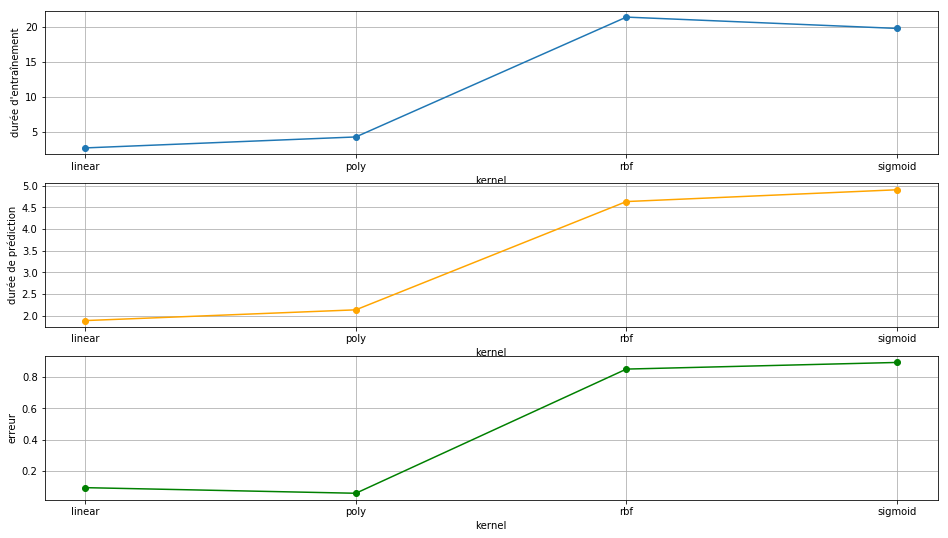

In [8]:
kernels_liste = list(zip(*kernels))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(kernels_liste[0], kernels_liste[1], 'o-')
plt.xlabel('kernel')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(kernels_liste[0], kernels_liste[2], 'o-', color='orange')
plt.xlabel('kernel')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(kernels_liste[0], kernels_liste[3], 'o-', color='green')
plt.xlabel('kernel')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [9]:
meilleur_kernel = min(normaliser_resultats(kernels), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Kernel optimal = " + str(meilleur_kernel))

Kernel optimal = linear


## Variation de la tolérance aux erreurs `C`

In [10]:
%%time

tolerances = []
print("Variations de la tolérance : ")
for tolerance in np.linspace(0.1, 1.0, num=5):
    clsvm = svm.SVC(C=tolerance)
    debut_entrainement = time.time()
    clsvm.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = clsvm.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    erreur_entrainement = clsvm.score(xtrain, ytrain)
    tolerances.append((tolerance, duree_entrainement, duree_prediction, erreur, erreur_entrainement))
    print(f"\t {tolerances[-1]}")

Variations de la tolérance : 
	 (0.1, 21.936340808868408, 5.345666408538818, 0.8953333333333333, 0.11228571428571428)
	 (0.325, 21.47153902053833, 4.705410718917847, 0.8953333333333333, 0.114)
	 (0.55, 22.069915771484375, 4.849060773849487, 0.8526666666666667, 1.0)
	 (0.775, 19.670439958572388, 4.836021900177002, 0.8526666666666667, 1.0)
	 (1.0, 19.474886894226074, 4.589724063873291, 0.8526666666666667, 1.0)
Wall time: 3min 4s


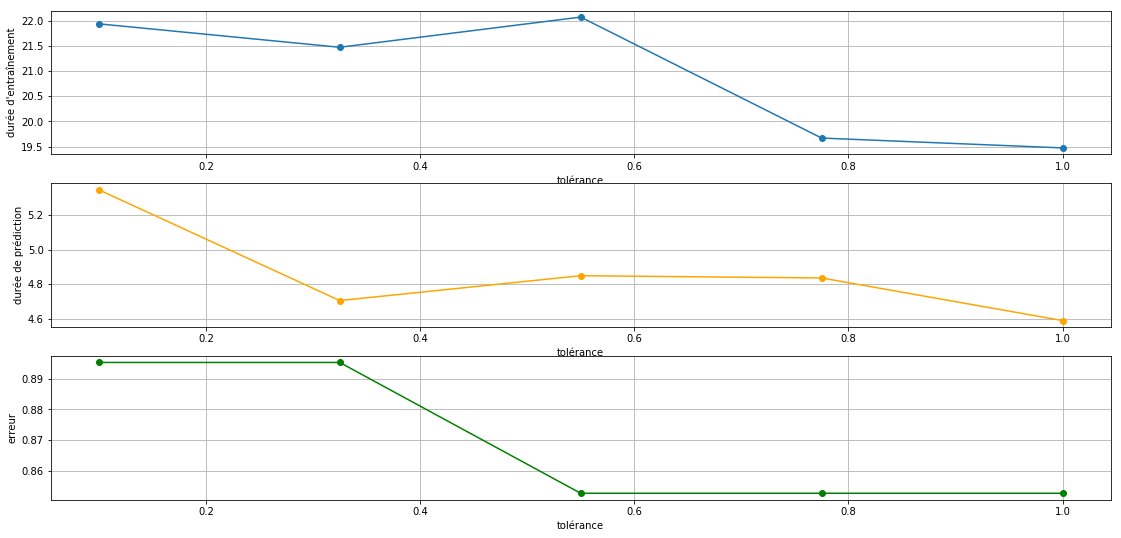

In [18]:
tolerances_liste = list(zip(*tolerances))

fig = plt.figure(figsize=(19, 9))
plt.subplot(3, 1, 1)
plt.plot(tolerances_liste[0], tolerances_liste[1], 'o-')
plt.xlabel('tolérance')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tolerances_liste[0], tolerances_liste[2], 'o-', color='orange')
plt.xlabel('tolérance')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tolerances_liste[0], tolerances_liste[3], 'o-', color='green')
plt.xlabel('tolérance')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [12]:
meilleure_tolerance = min(normaliser_resultats(tolerances), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Tolérance optimale = " + str(meilleure_tolerance))

Tolérance optimale = 1.0


Regardons la courbe d'erreur sur les données d'entraînement et de test en fonction de C.

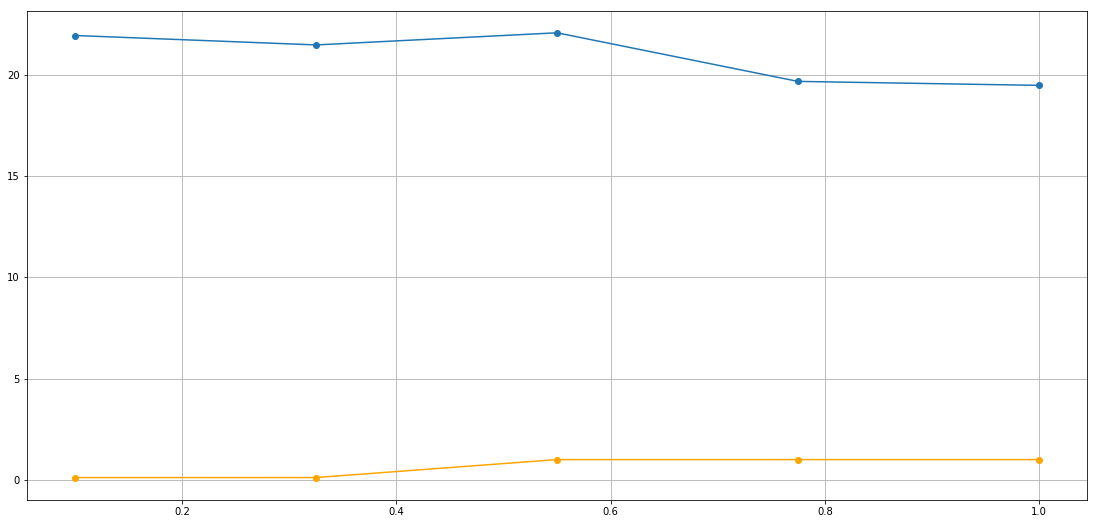

In [13]:
fig = plt.figure(figsize=(19, 9))
plt.plot(tolerances_liste[0], tolerances_liste[1], 'o-')
plt.plot(tolerances_liste[0], tolerances_liste[-1], 'o-', color='orange')
plt.grid(True)
plt.show()

## Meilleur SVM

In [14]:
print("Les meilleurs hyperparamètres trouvés sont : ")
print(f"\t kernel : {meilleur_kernel}")
print(f"\t tolérance : {meilleure_tolerance}")

Les meilleurs hyperparamètres trouvés sont : 
	 kernel : linear
	 tolérance : 1.0


In [15]:
%%time
meilleur_svm = svm.SVC(kernel='linear', C=meilleure_tolerance)
debut_entrainement = time.time()
meilleur_svm.fit(xtrain, ytrain)
meilleure_duree_entrainement = time.time() - debut_entrainement
debut_prediction = time.time()
ypred = meilleur_svm.predict(xtest)
meilleure_duree_prediction = time.time() - debut_prediction
cv_scores = model_selection.cross_val_score(meilleur_svm, data, target, cv=10)
meilleure_erreur = 1 - np.mean(cv_scores)

print(f"Durée de l'entraînement : {meilleure_duree_entrainement}")
print(f"Durée de la prédiction : {meilleure_duree_prediction}")
print(f"Erreur : {meilleure_erreur}")

Durée de l'entraînement : 2.462445020675659
Durée de la prédiction : 1.7652409076690674
Erreur : 0.08538679379788872
Wall time: 47.7 s


### Erreur par chiffre

Erreur par chiffre : 
	 (0, 0.03947368421052633)
	 (1, 0.031847133757961776)
	 (2, 0.11875000000000002)
	 (3, 0.09302325581395354)
	 (4, 0.05517241379310345)
	 (5, 0.14400000000000002)
	 (6, 0.03472222222222221)
	 (7, 0.0641025641025641)
	 (8, 0.203125)
	 (9, 0.1428571428571429)


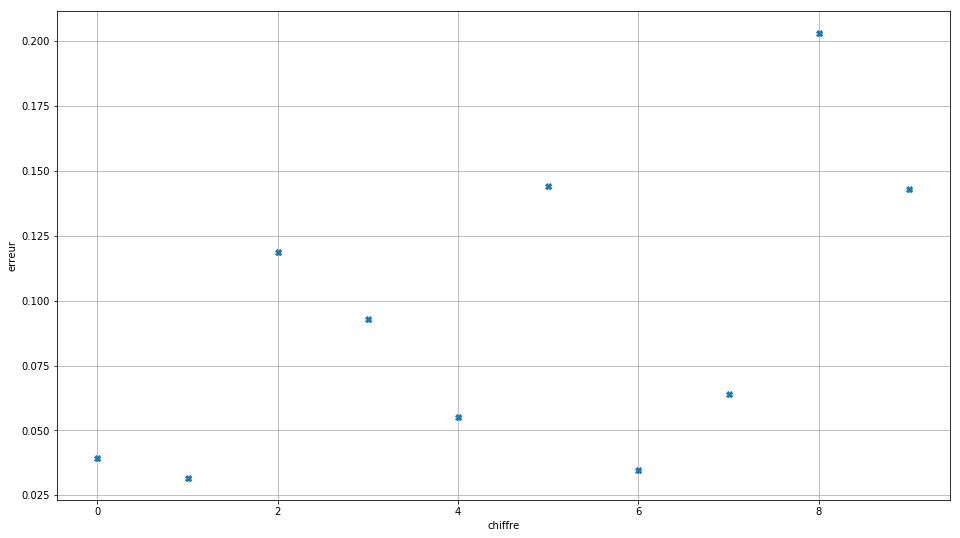

Chiffre le plus précis : 1
Chiffre le moins précis : 8


In [16]:
chiffres = []
print("Erreur par chiffre : ")
for chiffre in range (0, 10):
    erreur = 1 - (ypred[ytest==chiffre] == ytest[ytest==chiffre]).sum() / (ytest==chiffre).sum()
    chiffres.append((chiffre, erreur))
    print(f"\t {chiffres[-1]}")

plt.figure(figsize=(16, 9))
plt.plot(*zip(*chiffres), 'X')
plt.xlabel('chiffre')
plt.ylabel('erreur')
plt.grid(True)
plt.show()

meilleur_chiffre = min(chiffres, key=lambda item:(item[1]))[0]
pire_chiffre = max(chiffres, key=lambda item:(item[1]))[0]
print(f"Chiffre le plus précis : {meilleur_chiffre}")
print(f"Chiffre le moins précis : {pire_chiffre}")

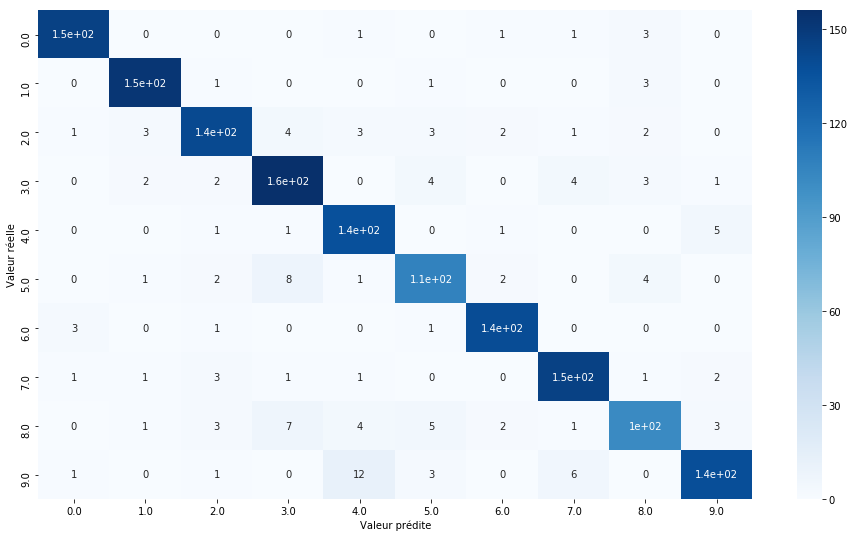

In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(cm, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Valeur réelle'
df_cm.columns.name = 'Valeur prédite'
plt.figure(figsize = (16,9))
sn.heatmap(df_cm, cmap="Blues", annot=True)
plt.show()